In [7]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plots

matplotlib.style.use('ggplot')

In [8]:
env = BlackjackEnv()


In [69]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for episode in range(num_episodes):
        episode = []
        state = env.reset()
        for t in range(100):
            # sample action from the policy
            action = policy(state)
            
            # environments' effects after taking action
            next_state, reward, done, _ = env.step(action)
            
            episode.append((state, action, reward))
            if done:
                break
                
            state = next_state
            
        # update value function 
        # get all states visited in the episodes
        episode_states = set([tuple(x[0]) for x in episode])
        for state in episode_states:
            # find the first occ of the current state
            first_occ_idx = next(i for i, x in enumerate(episode) if x[0]==state)
            
            # calculate return from that time step
            G = np.sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occ_idx:])])
            
            # update dicts with key as state
            returns_sum[state] += G
            returns_count[state] += 1
            
            # take average and update value of current state
            V[state] = returns_sum[state] / returns_count[state]

    return V

In [70]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

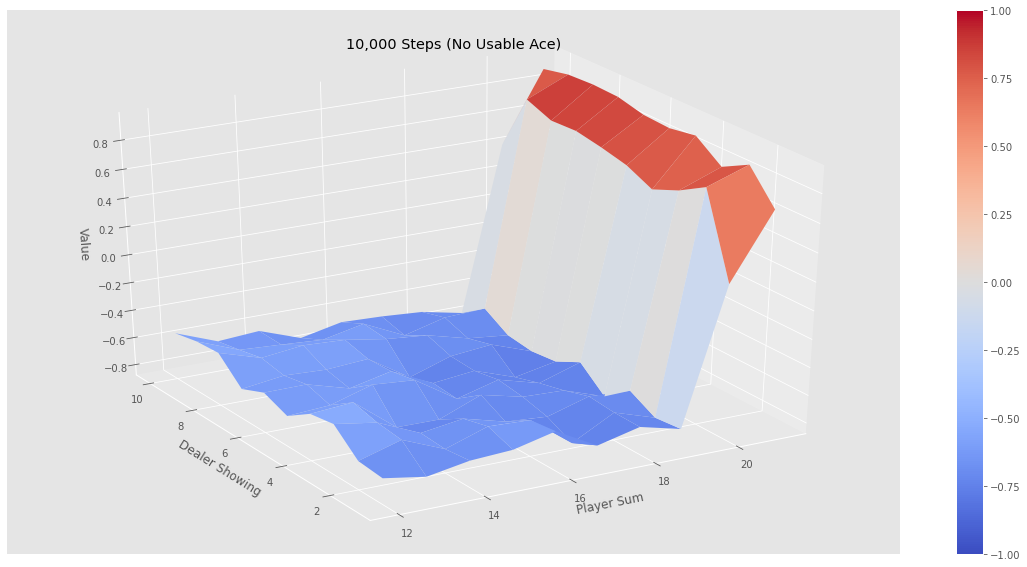

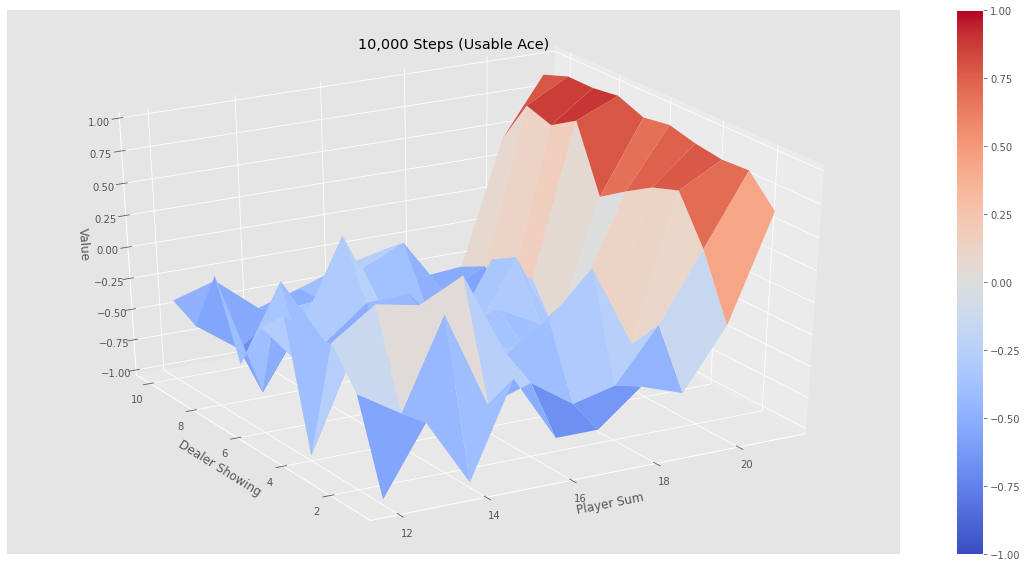

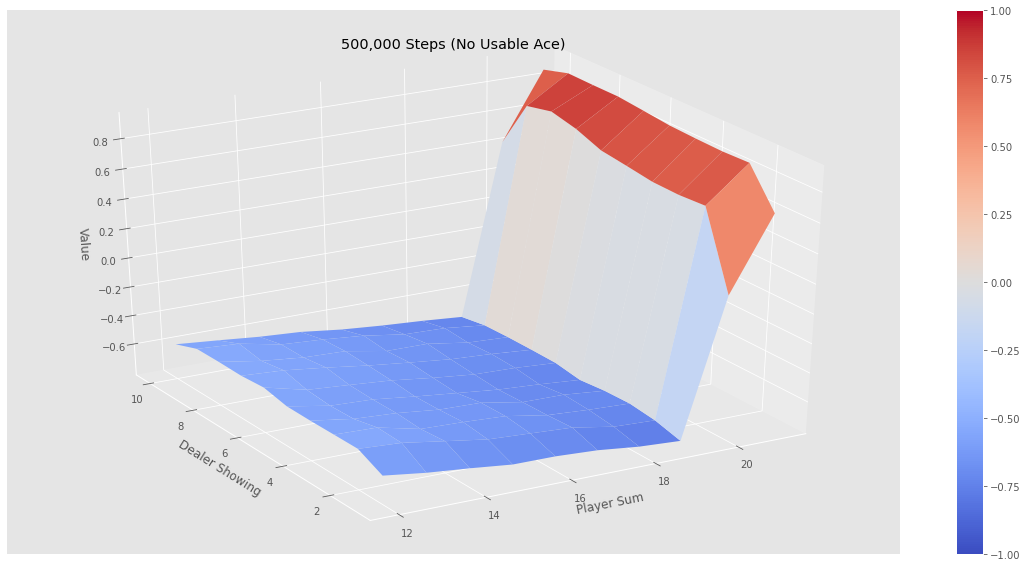

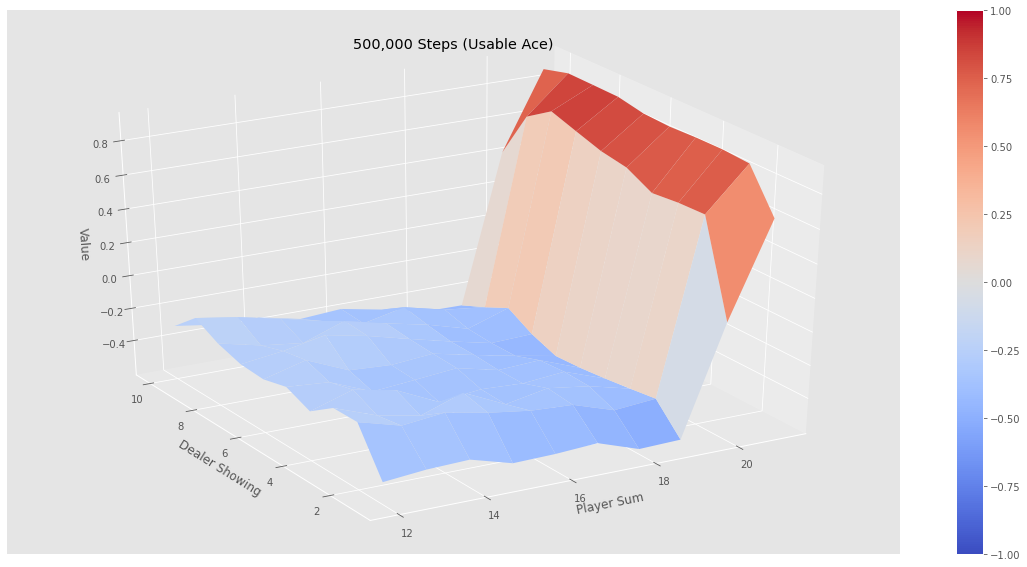

In [71]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plots.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plots.plot_value_function(V_500k, title="500,000 Steps")